Install and import packages

In [ ]:
#%pip install opencv-python
#%pip install scikit-image
#%pip install matplotlib

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color 
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern


## Task 1: SIFT vs ORB for Keypoint Detection
### Helper functions in the cell below

In [2]:
# Function to load an image as grayscale.
def load_grayscale_img(image_path):
    # Read image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Ensure the image is loaded
    if img is None:
        print("Error: Unable to load image.")
        return
    else:
        return img

# Plot 1 image    
def plot_one_image(img, title=""):
        plt.figure(figsize=(12, 6))
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
        
# Function to Plot to images side by side    
def plot_two_images(img1, img2, title1 = "", title2 = ""):
    # Plot results
    plt.figure(figsize=(12, 12))

    # Plot 1st image
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    # Plot 2cnd Image
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    # Show plot
    plt.show()


# Function to run SIFT and ORB functions to detect keypoints and extract descriptors
# Returns 3 arrays, each of size [1,1] containing:
#     [Orb Keypoints, Orb Descriptors]
#     [Sift Keypoints, Sift Descriptors]    
#     [Time taken to create  [Orb Keypoints, Orb Descriptors], Time taken to create  [Sift Keypoints, Sift Descriptors] ]
def detect_and_draw_keypoints(img, keypoints = ''):    
    if keypoints == '':
        # Initialize SIFT, ORB, using default number of keypoints
        sift = cv2.SIFT_create()
        orb = cv2.ORB_create()
    else: 
        # Use passed number of keypoints
        sift = cv2.SIFT_create(keypoints)
        orb = cv2.ORB_create(keypoints) 

    # Start timer for performace query
    sift_start_time = cv2.getTickCount()
    # Detect SIFT keypoints and compute descriptors
    sift_keypoints, sift_descriptors = sift.detectAndCompute(img, None)
    # Capture end time
    sift_end_time = cv2.getTickCount()
    # Calculate execution time
    sift_time_taken = (sift_end_time - sift_start_time) / cv2.getTickFrequency()
    
    # Start timer for performace query
    orb_start_time = cv2.getTickCount()
    # Detect Orb keypoints and compute descriptors
    orb_keypoints, orb_descriptors = orb.detectAndCompute(img, None)
    # Capture end time
    orb_end_time = cv2.getTickCount()
    orb_time_taken = (orb_end_time - orb_start_time) / cv2.getTickFrequency()

    # Draw keypoints on the image
    img_sift = cv2.drawKeypoints(img, sift_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_orb = cv2.drawKeypoints(img, orb_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Plot the results
    plot_two_images(img_sift, img_orb, f'SIFT Keypoints: {len(sift_keypoints)}\n TIME Taken: {sift_time_taken}',  f'ORB Keypoints: {len(orb_keypoints)}\n TIME Taken:{orb_time_taken}')
    
    # Return ORB and SIFT keypoints and descriptors
    return [orb_keypoints, orb_descriptors], [sift_keypoints, sift_descriptors], [orb_time_taken, sift_time_taken]


### Feature Detection 
Load and the deer image. Create a new image of the Deer flipped both horizontally and vertically.

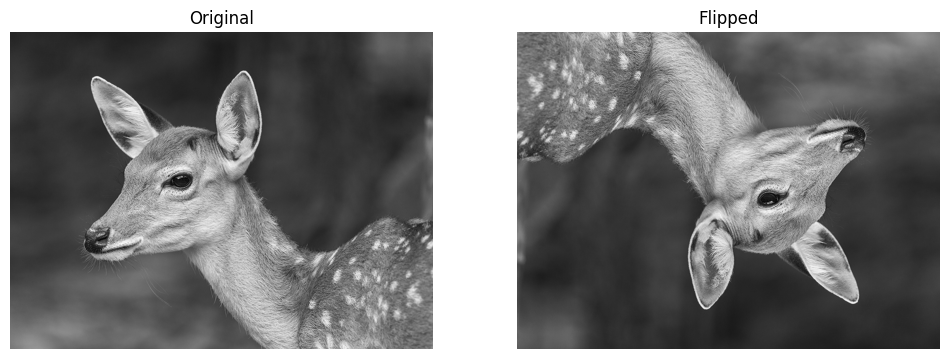

In [3]:
# Load images        
deer1 = load_grayscale_img('Data/Deer.jpg')
# Flip Deer  both horizontally and vertically
deer2 = cv2.flip(deer1, -1)
# Show both images
plot_two_images(deer1, deer2, 'Original', 'Flipped')


#### Get the default number of ORB and SIFT outputs for both images

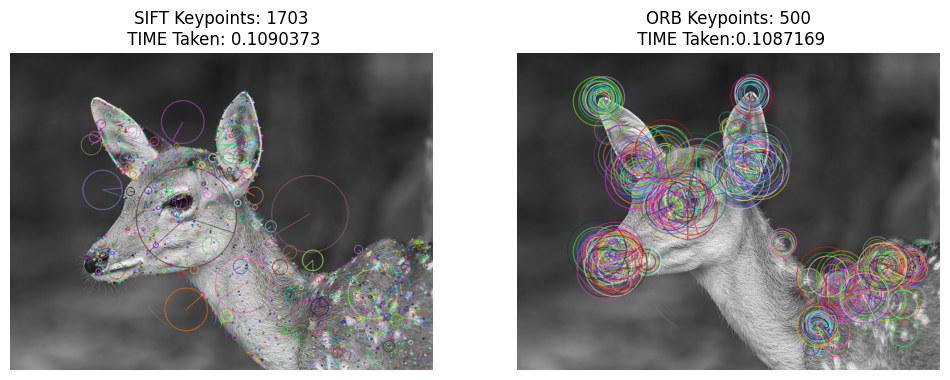

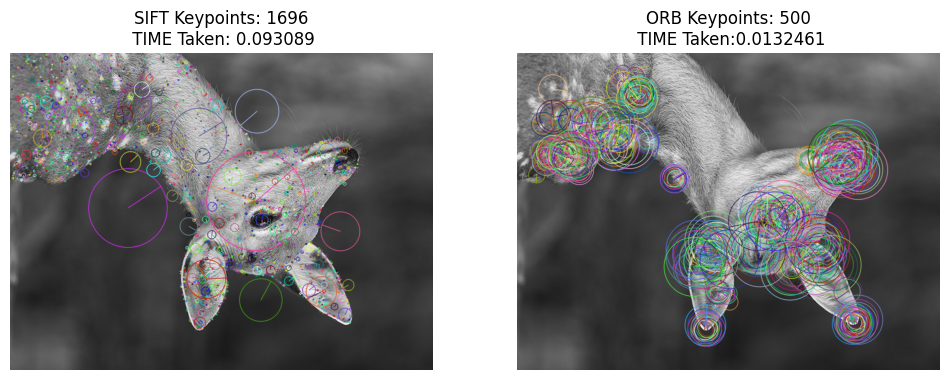

[0.1087169, 0.1090373] [0.0132461, 0.093089]


In [4]:
# Get ORB and Sift descriptors and keypoints for both deer pictures
orb1, sift1, performance1 = detect_and_draw_keypoints(deer1)
orb2, sift2, performance2 = detect_and_draw_keypoints(deer2)

print(performance1, performance2)

SIFT Keypoints - Orginal Deer: 1703
SIFT Keypoints - Flipped Deer: 1696

ORB Keypoints - Orginal Deer: 500 
ORB Keypoints - Flipped Deer: 500

#### Get a fixed number of keypoints

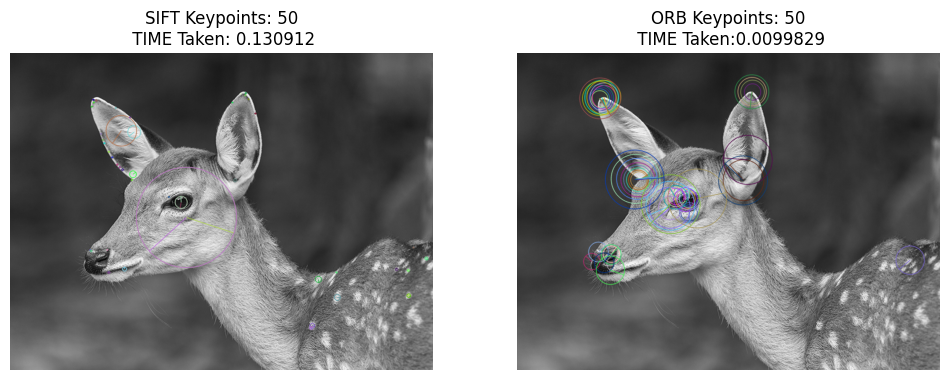

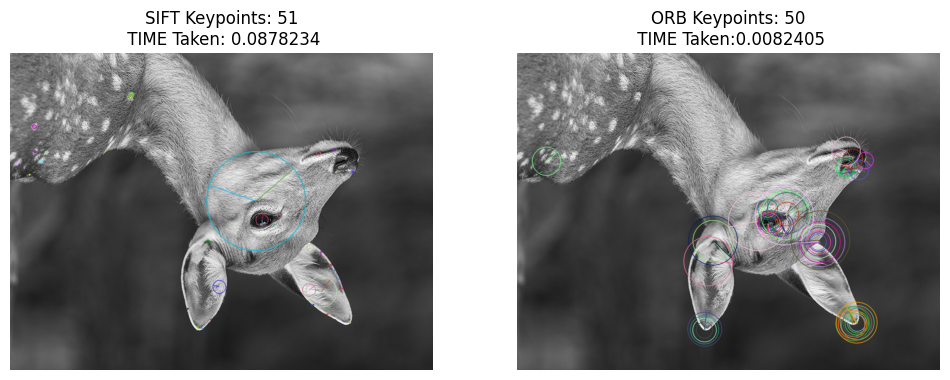

In [5]:
# Get ORB and Sift descriptors and keypoints for both deer pictures
orb1, sift1, performance1 = detect_and_draw_keypoints(deer1, 50)
orb2, sift2, performance2 = detect_and_draw_keypoints(deer2, 50)

### Brute Force Match

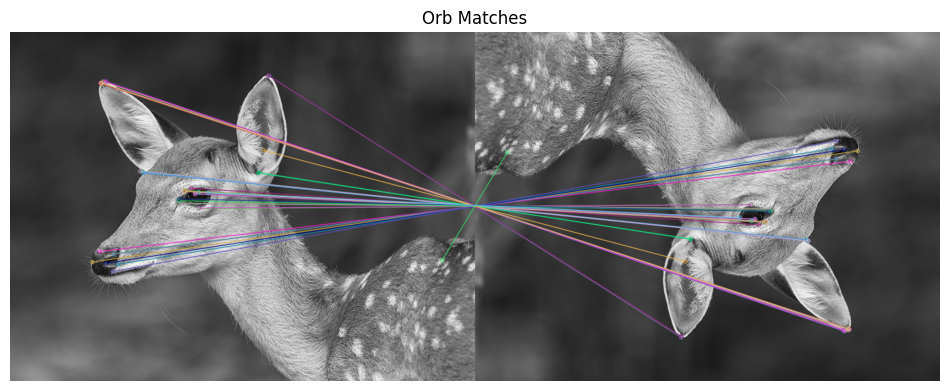

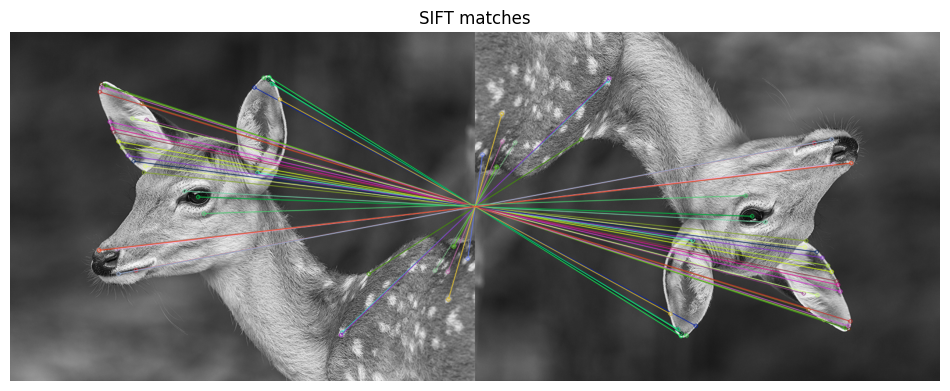

In [6]:
def bf_match(img1, img2,orb1, orb2, sift1, sift2):
    # create BFMatcher object
    orb_bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    sift_bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    # Match descriptors
    orb_descriptor_matches = orb_bf.match(orb1[1],orb2[1])
    sift_descriptor_matches = sift_bf.match(sift1[1],sift2[1])

    # Draw first matches
    orb_matches = cv2.drawMatches(img1, orb1[0], img2, orb2[0], orb_descriptor_matches[:-1], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    sift_matches = cv2.drawMatches(img1, sift1[0], img2, sift2[0], sift_descriptor_matches[:-1], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Plot ORB match lines
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)
    plt.imshow(orb_matches)
    plt.title('Orb Matches')
    plt.axis('off')
    plt.show()

    # Plot SIFT match lines
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)
    plt.imshow(sift_matches)
    plt.title('SIFT matches')
    plt.axis('off')

    plt.show()
    

# Call the function
bf_match(deer1, deer2, orb1, orb2, sift1, sift2)

## Task 2: GLCM vs LBP for Texture Analysis
### Compute Local Binary Patterns

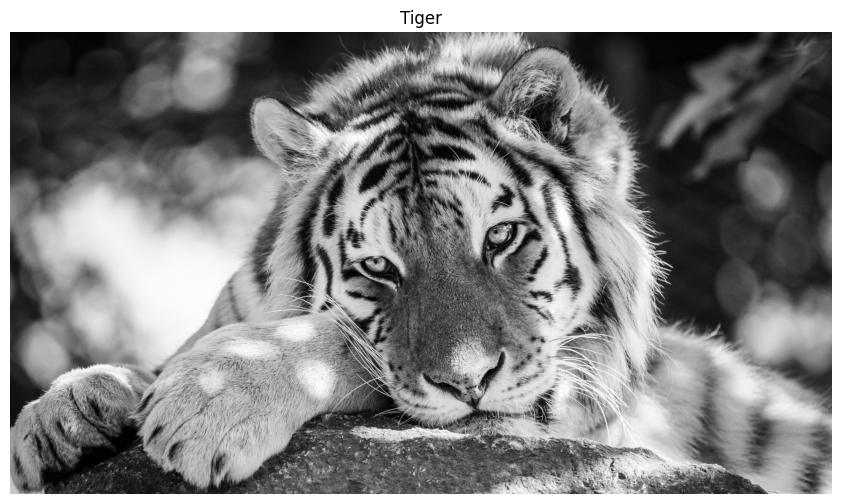

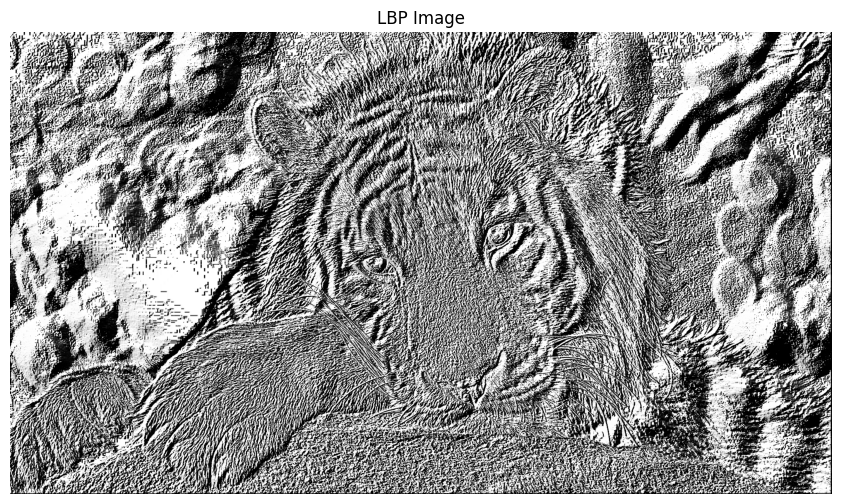

Time take for LBP calculations: 1.4467764 seconds


In [7]:
# Load tiger image
image = load_grayscale_img('Data/Tiger-1.jpg')
plot_one_image(image, "Tiger")

def draw_lbp_texture(image, p=24, r=3, meth = 'default'):
    # Start performance timer
    start_time = cv2.getTickCount()
    # Calculate local binary patterns, with p Points with radius of r
    lbp = local_binary_pattern(image, P = p, R = r, method = meth)
    # End timer
    end_time = cv2.getTickCount()
    # Calculate execution time
    time_taken = (end_time - start_time) / cv2.getTickFrequency()

    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title("LBP Image")
    plt.axis('off')
    plt.show()

    print(f'Time take for LBP calculations: {time_taken} seconds')
draw_lbp_texture(image)

The LBP method shows the texture and shading(?) of the deer fur. we can see the fine hairs in the deers ears and whiskers under the chin, and  how the fur thickens down the body.
This method is also revealing more details about the background. The original image's background was blurred, but in the LBP texture image, we can see some vertical lines that I believe are trees.

### GLCM

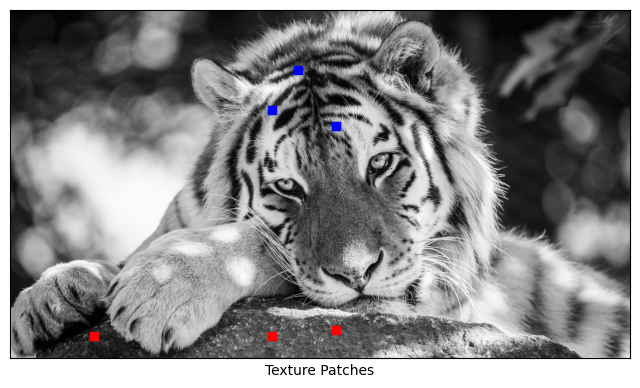

In [8]:

PATCH_SIZE=21

# select some patches from lighter areas of the image
# Rock Texture
texture1_location = [(1000, 800), (980,1000), [1000,250]]
texture1_patches = []
for loc in texture1_location:
    texture1_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

# Fur texture
texture2_location = [(300,800), (350,1000), (175,880)]
texture2_patches = []
for loc in texture2_location:
    texture2_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

# compute some GLCM properties each patch
xs = []
ys = []
for patch in texture1_patches + texture2_patches:
    glcm = graycomatrix(
        patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True
    )
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for y, x in texture1_location:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'rs')
for y, x in texture2_location:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Texture Patches')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

plt.show()

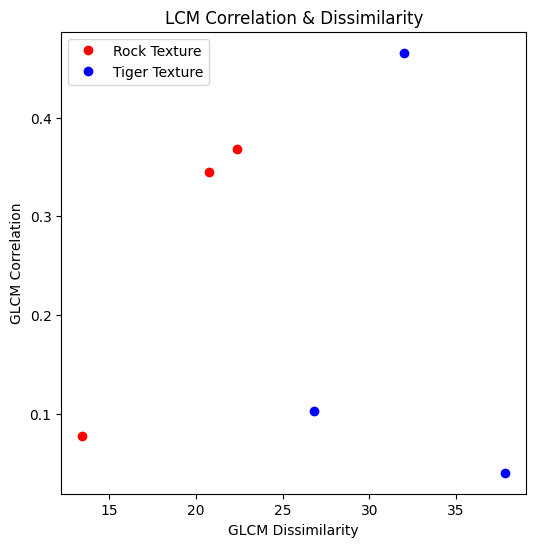

In [9]:
# create the figure
fig = plt.figure(figsize=(6,6))
# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1,1,1)
ax.plot(xs[: len(texture1_patches)], ys[: len(texture1_patches)], 'ro', label='Rock Texture')
ax.plot(xs[len(texture1_patches) :], ys[len(texture1_patches) :], 'bo', label='Tiger Texture')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend(loc='upper left')
plt.title('LCM Correlation & Dissimilarity')
plt.show()
